In [21]:
%matplotlib inline
import numpy as np
import pandas as pd

import viz # curriculum example visualisations

np.random.seed(29)

#### The numpy.random module provides a number of functions for generating random numbers.

    np.random.choice: selects random options from a list
    np.random.uniform: generates numbers between a given lower and upper bound
    np.random.random: generates numbers between 0 and 1
    np.random.randn: generates numbers from the standard normal distribution
    np.random.normal: generates numbers from a normal distribution with a specified mean and standard deviation
    
28 November 2022


In [22]:
print(np.random.choice(3,2))
print('.')
print(np.random.choice(3,2))
print('.')
print(np.random.uniform(4,3,5))
print('.')
print(np.random.random())
print('.')
print(np.random.randn(9))
print('.')
print(np.random.normal())

[1 0]
.
[1 2]
.
[3.02991466 3.50971738 3.66670587 3.66904003 3.14539055]
.
0.8316569311037657
.
[ 0.92776142  0.46506349 -0.15604224 -0.17646349  0.01649179 -2.21159748
  1.07852432 -1.34154236 -0.19586709]
.
-1.674203869127086


#### Simulating rolling three six-sided dice

In [23]:
n_trials = nrows = 1_0000
# represents no of trials

n_dice = ncols = 3
# represents number of dice rolled

# using random choice to select from provided-below list.

# we will need n_trials * n_dice

rolls = np.random.choice([1,2,3,4,5,6], n_trials * n_dice).reshape(nrows, ncols)

# reshape into rows of 3 columns
rolls

array([[5, 5, 1],
       [3, 1, 3],
       [5, 3, 1],
       ...,
       [3, 3, 1],
       [2, 2, 3],
       [6, 3, 4]])

In [24]:
# computing the sum of each roll (event)

sums_by_trial = rolls.sum(axis = 1)

# return the array of each sum
sums_by_trial


array([11,  7,  9, ...,  7,  7, 13])

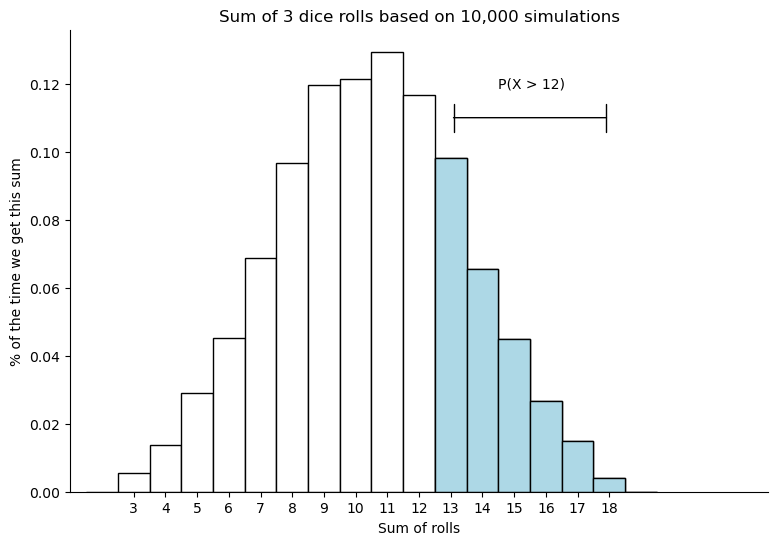

In [25]:
viz.simulation_example1(sums_by_trial)

# displays distribution frequency of the sum of 3 dice being rolled

In [26]:
# find the number of wins
# use a comparison opperator (boolean)

wins = sums_by_trial > 12
wins

array([False, False, False, ..., False, False,  True])

In [27]:
sum(wins)

2543

In [28]:
# convert boolean True and False to an integer (int)

# take the mean, which is the win rate


win_rate = wins.astype(int).mean()
win_rate

# sum of values (= No of wins, bc win = 1) divided by number of values (total trials) = mean


0.2543

In [30]:
# ...

looses = sums_by_trial < 12
looses

array([ True,  True,  True, ...,  True,  True, False])

In [31]:
lose_rate = looses.astype(int).mean()
lose_rate

0.6289

In [32]:
# ...

sum(looses)

6289

In [33]:
# ...

sum(looses) - sum(wins)

3746

In [34]:
.2644 + .6149

0.8793

In [35]:
# cost to play : $ 5 per round

# win (sum greater than 12) = gain $ 15

# profit = winnings - cost to play (ie, $ 10)

# liklihood of winning * Money earned per win in dollars
expected_winnings = win_rate * 15

# fixed cost of $ 5 per game
cost = 5

# subtract cost
expected_profit = expected_winnings - cost

# return expected profit for each game played
expected_profit 

-1.1854999999999998

In [36]:
# Changing the game

# Win is now >= 12

# check the condition
wins = sums_by_trial >= 12

# make the boolean value 0 or 1
win_rate = wins.astype(int).mean()

# amount earned
expected_winnings = win_rate * 15

# fixed cost
cost = 5

# account for the cost
expected_profit = expected_winnings - cost

# return expected profit for each game played
expected_profit


0.5664999999999996

### Toddler takes a nap  

P(nap at weekend) = 0.3  
This is the probability that the toddler takes a nap on _at least_ one day of the weekend.

In [13]:
p_nap = 0.3

# two columns : Sat and Sun
ndays = ncols = 2

# number of trials (ie, weekends trialled) : 100 000.
n_simulated_weekend = nrows = 10 ** 5

In [14]:
data = np.random.random((nrows, ncols))
data

array([[0.48557099, 0.53955562],
       [0.43332156, 0.42358032],
       [0.6956352 , 0.46954804],
       ...,
       [0.81615073, 0.90674556],
       [0.7899493 , 0.01551448],
       [0.78973357, 0.69409461]])

In [15]:
# how many naps occured, using the generated, random value ?

naps = data < p_nap
naps

array([[False, False],
       [False, False],
       [False, False],
       ...,
       [False, False],
       [False,  True],
       [False, False]])

In [37]:
naps.sum()

60089

In [16]:
# returns the probability of napping at the weekend

napping = naps.astype(int).mean()
napping

0.300445

In [17]:
print(naps.sum(axis = 1))
print(naps.sum())

[0 0 0 ... 0 1 0]
60089


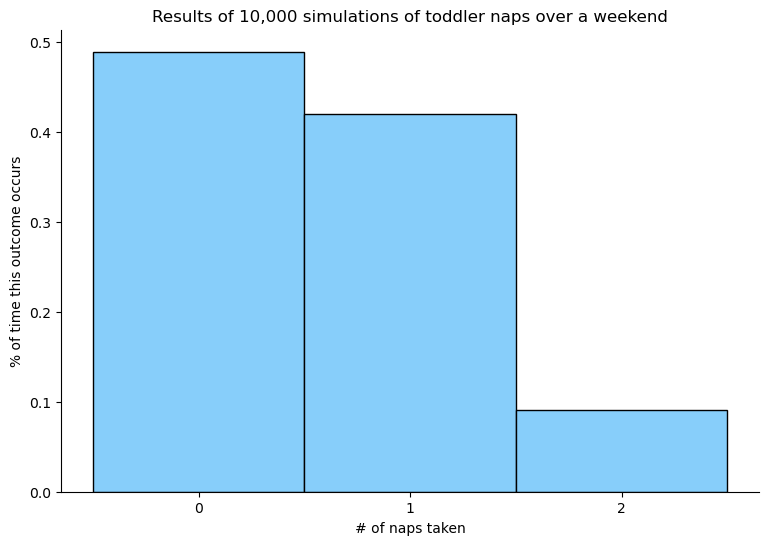

In [18]:
viz.simulation_example2(naps)

In [19]:
# probability of at least 1 nap (ie, 1 nap or 2 naps)

# mean is the total greater than 1 / no of trials

(naps.sum(axis = 1) >= 1).mean()

0.51053

In [20]:
# probability of no naps

(naps.sum(axis = 1) < 1).mean()

# same thing as above
(naps.sum(axis = 1) == 0).mean()

0.48947

<h2 style="background-color:lime  ;">Make a data frame</h1> 

In [11]:
# check if at least one roll is a 3 in each row


n_simulations = nrows = 10 ** 5
n_dice_rolled = ncols = 3

# dice rolls
rolls = np.random.choice([1,2,3,4,5,6], nrows * ncols).reshape(nrows, ncols)


# randomly select from the list above
rolls

# structured as a matrix (dataframe)
#  by using   .reshape(nrows, ncols)



array([[4, 6, 2],
       [5, 2, 5],
       [3, 5, 2],
       ...,
       [2, 5, 4],
       [2, 3, 3],
       [1, 1, 5]])

In [10]:
# lambda function

# checks if a 3 is in a given row 
(pd.DataFrame(rolls)
 .apply(lambda row: 3 in row.values, axis=1)
 .mean())

# probability of getting a 3 in a set of rolls (row)

0.4258